In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

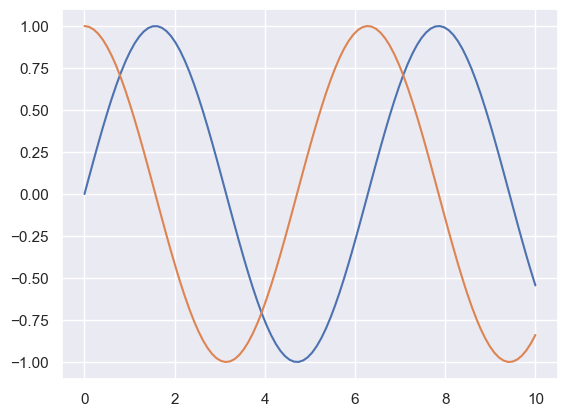

In [108]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

## 산점도

In [109]:
plt.style.available
plt.style.use('seaborn-v0_8-whitegrid')

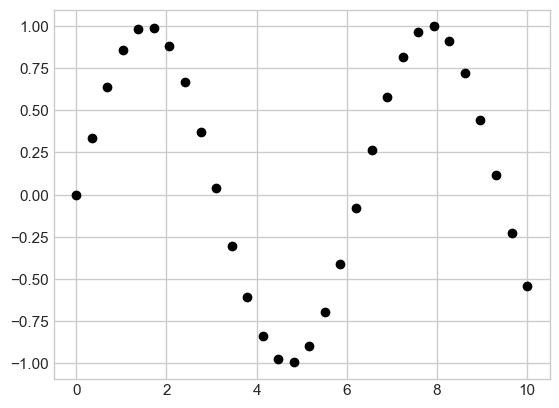

In [110]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color = 'black')

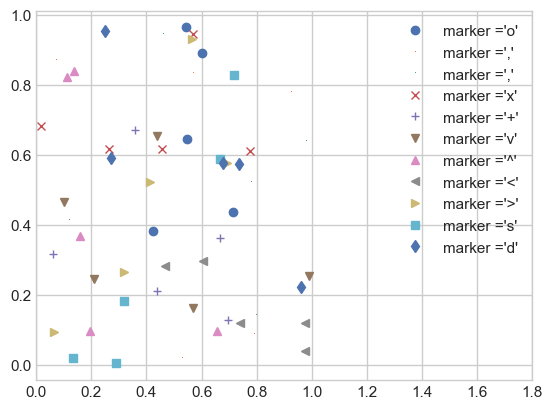

In [111]:
rng=np.random.RandomState(0)
for marker in ['o', ',', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label = "marker ='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8)

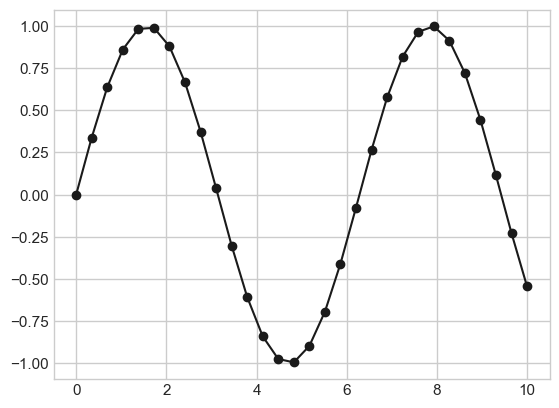

In [112]:
plt.plot(x, y, '-ok');

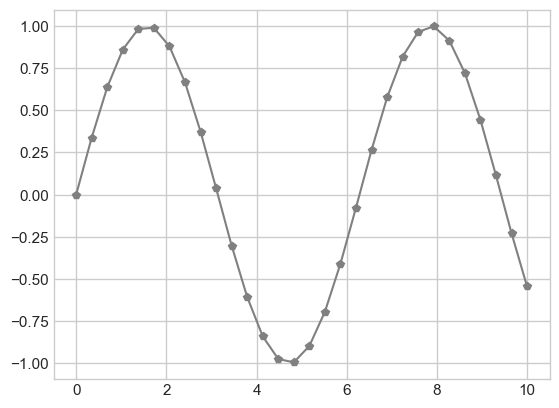

In [113]:
plt.plot(x, y, '-p', color ='gray')


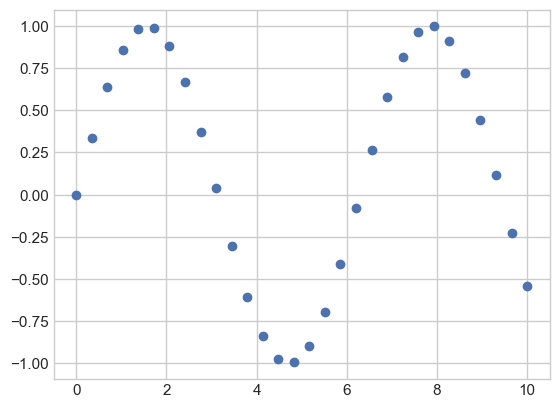

In [114]:
plt.scatter(x, y, marker='o')

<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

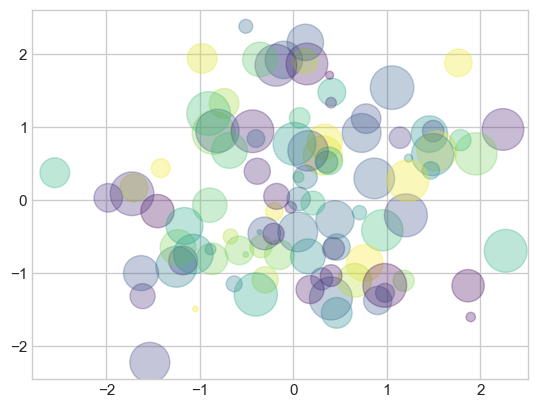

In [115]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s = sizes, alpha=0.3, cmap='viridis')
plt.colorbar

Text(0, 0.5, 'sepal width (cm)')

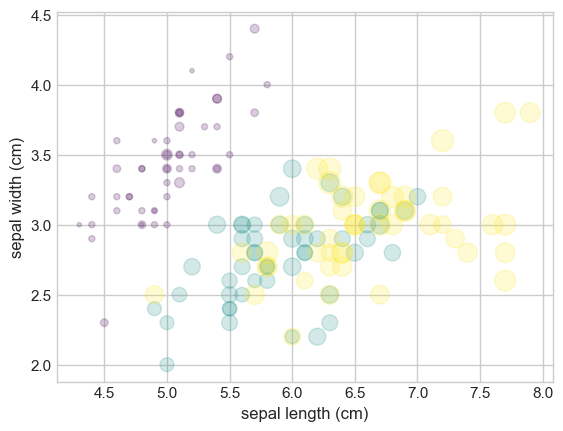

In [116]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

## 오차 시각화 하기

<ErrorbarContainer object of 3 artists>

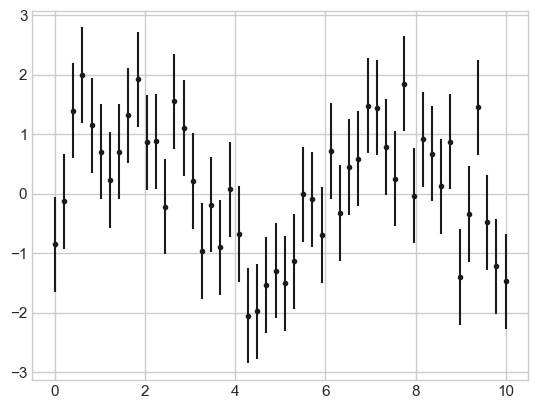

In [117]:
x = np.linspace(0, 10, 50)
dy = 0.8
y= np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

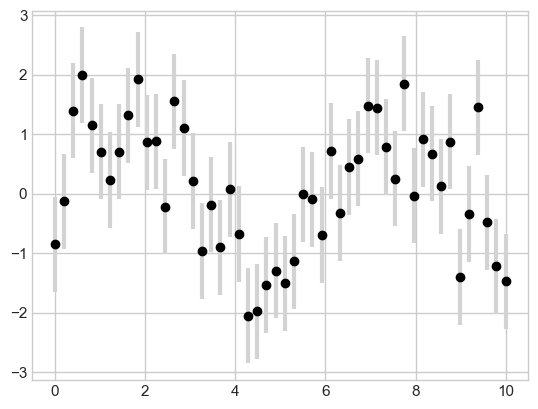

In [118]:
plt.errorbar(x,y, yerr=dy, fmt='o', color = 'black', ecolor='lightgray', elinewidth=3, capsize=0)

### 연속오차

In [119]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = lambda x : x* np.sin(x)
xdata = np.array([1, 3,5,6,8])
ydata = model(xdata)

#가우시안 프로세스 적합계산
gp = GaussianProcessRegressor(corr='cubic', theta=1e-2, thtaL=1e-4, thetaU=1e-1, random_start=100)
gp.fix(xdata[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)

TypeError: __init__() got an unexpected keyword argument 'corr'

In [ ]:
import seaborn as sns
sns.set()
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


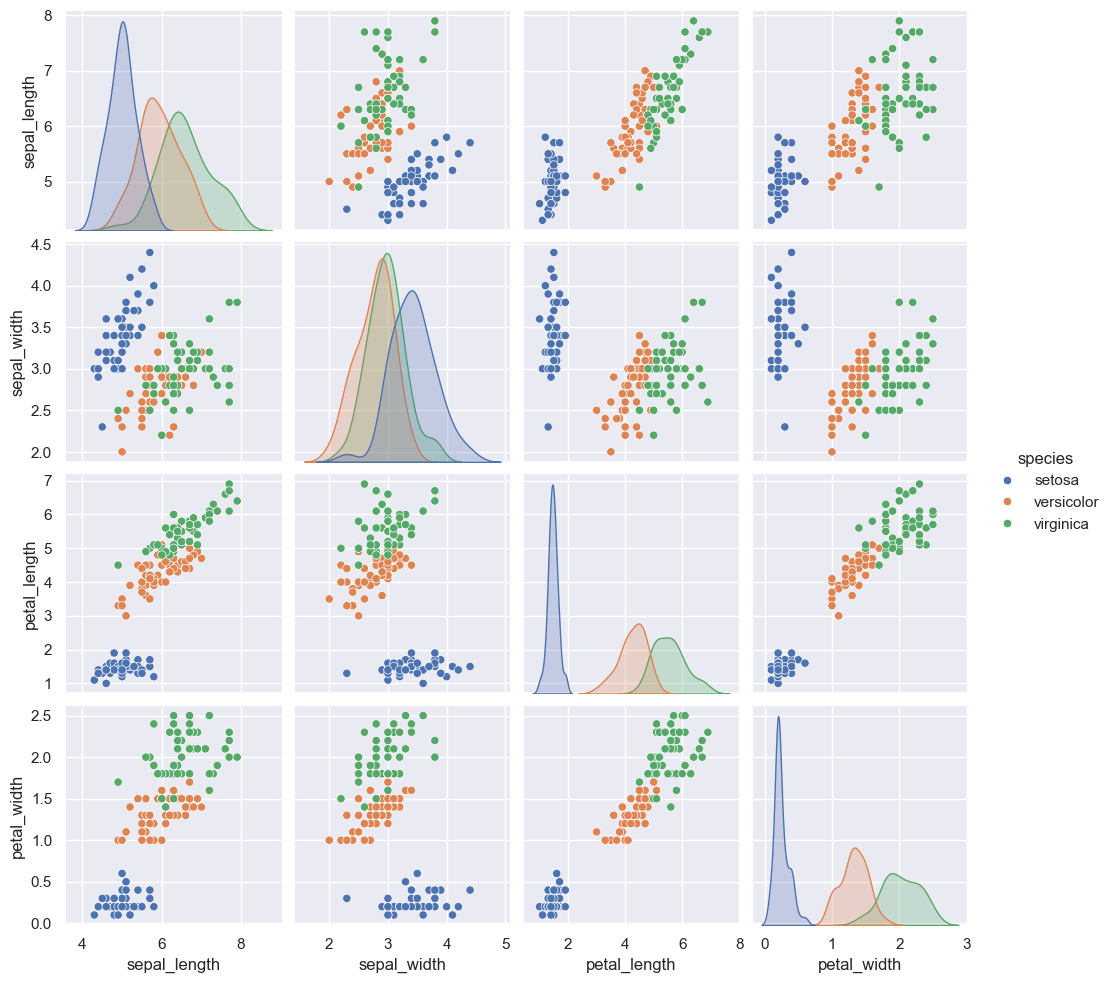

In [ ]:
sns.pairplot(iris, hue='species', height=2.5)

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


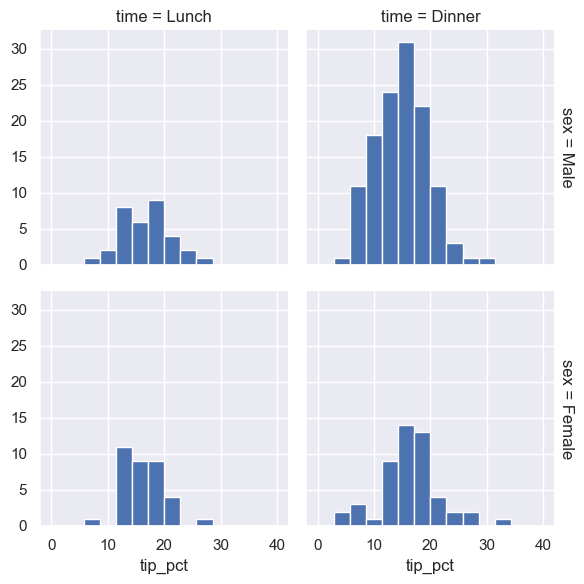

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

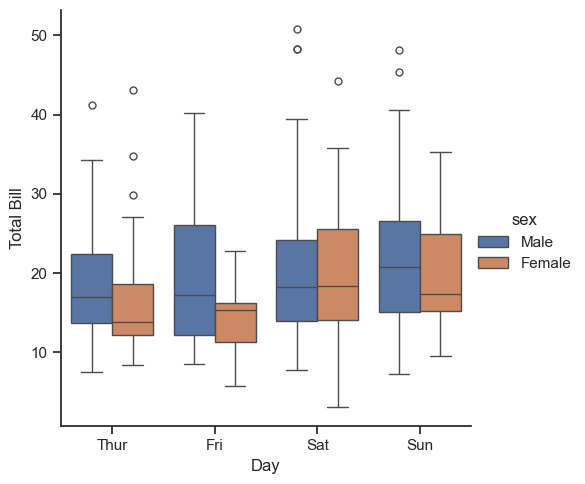

In [ ]:
with sns.axes_style(style='ticks'):
    g= sns.catplot(x="day", y='total_bill', hue='sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill')

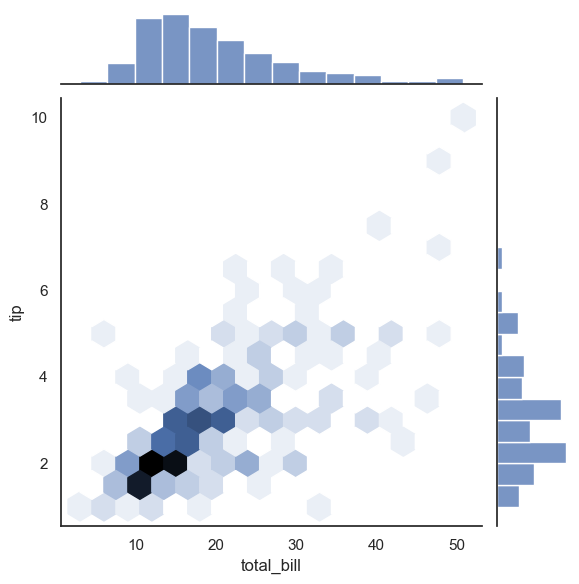

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data = tips, kind='hex')

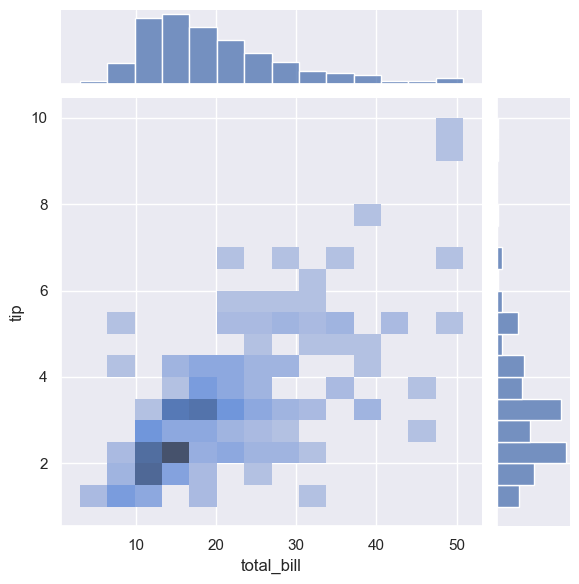

In [ ]:
# hist 히스토그램
sns.jointplot(x='total_bill', y='tip', data = tips, kind='hist')

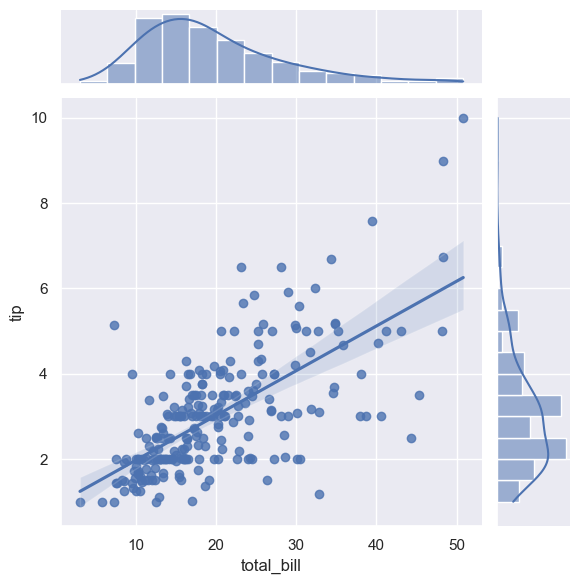

In [ ]:
# reg는 회귀(regression)
sns.jointplot(x='total_bill', y='tip', data = tips, kind='reg')

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


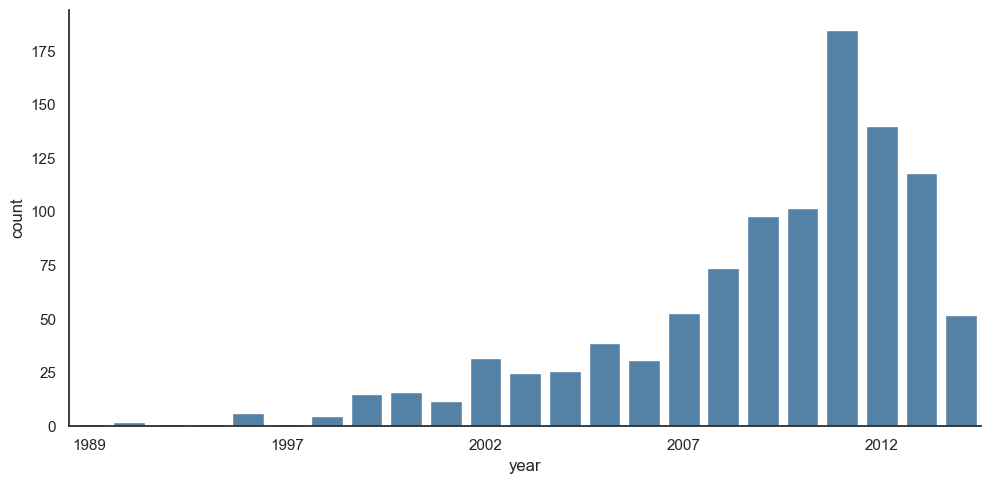

In [ ]:
with sns.axes_style('white'):
    g= sns.catplot(x='year', data = planets, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

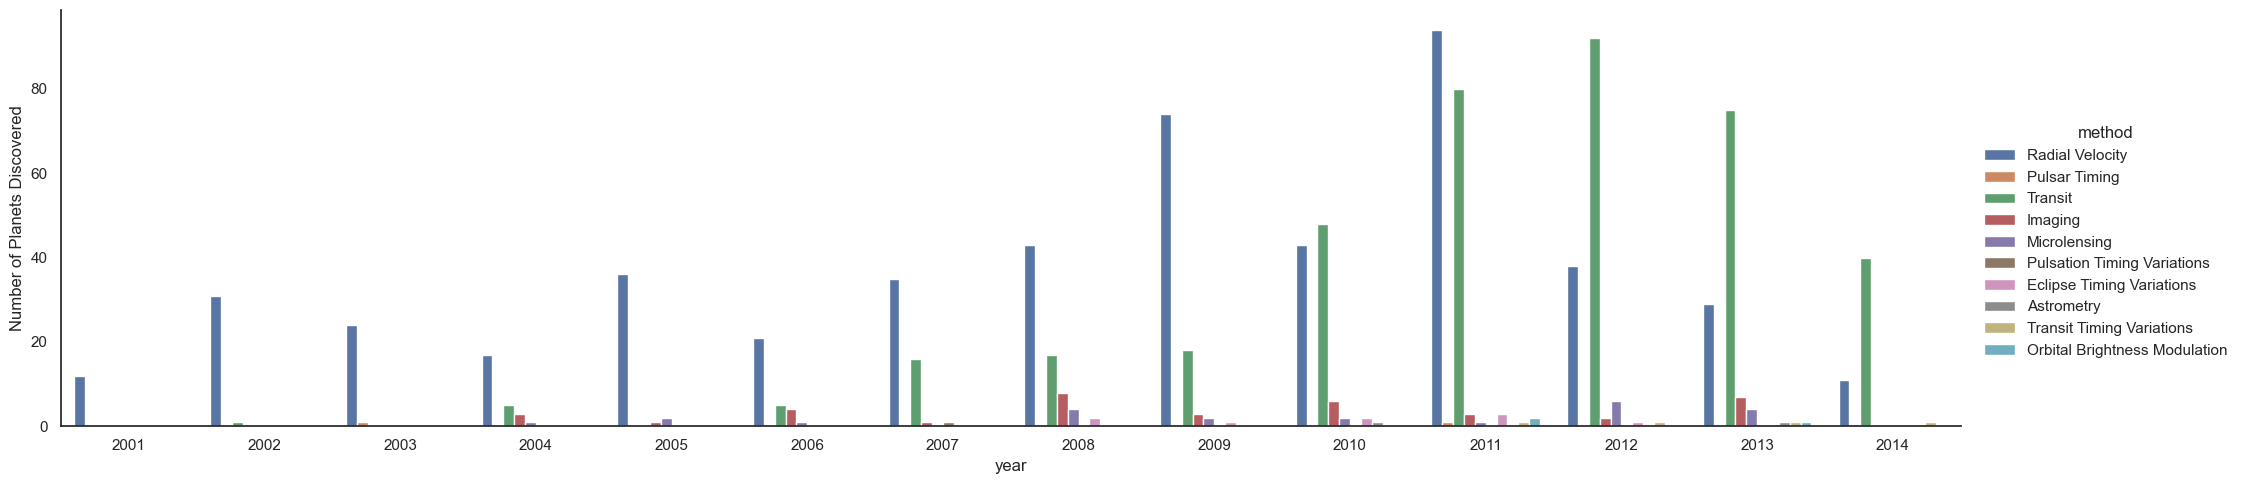

In [ ]:
with sns.axes_style('white'):
    g= sns.catplot(x='year', data=planets, aspect=4.0, kind='count', hue = 'method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## 예제. 마라톤 완주 시간 탐색

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv")
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [122]:
df.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [123]:
from datetime import timedelta
def convert_time(k) :
    h, m, s = map(int, k.split(':'))
    return timedelta(hours=h, minutes=m, seconds= s)
# map함수 같이 column에 모든 함수를 적용하기 위해선 컬럼명.apply(함수)
df['split'] = df['split'].apply(convert_time)
df['final'] = df['final'].apply(convert_time)

df.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [124]:
df.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [125]:
df['split_sec'] = df['split'].dt.total_seconds()
df['final_sec'] = df['final'].dt.total_seconds()
df.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


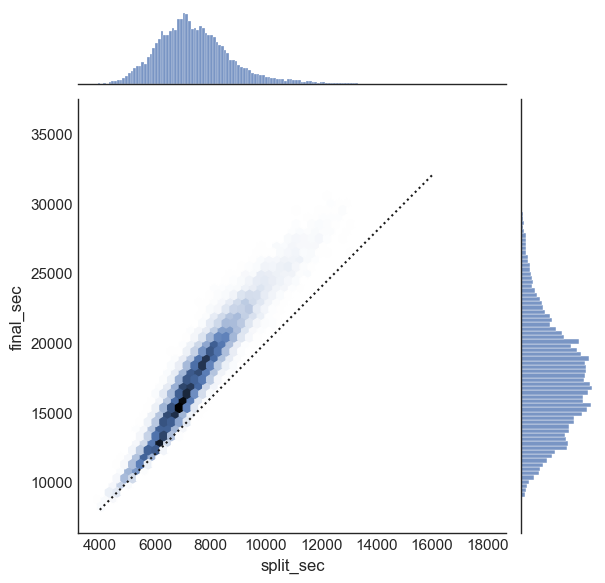

In [126]:
with sns.axes_style('white'):
    g=sns.jointplot(x='split_sec', y='final_sec', data=df, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [127]:
df['split_frac'] = 1-2*df['split_sec'] / df['final_sec']
df.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


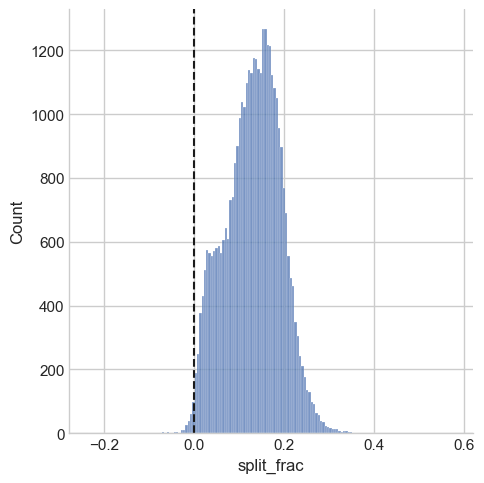

In [128]:
sns.displot(df['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle="--")

In [129]:
sum(df.split_frac<0)

251

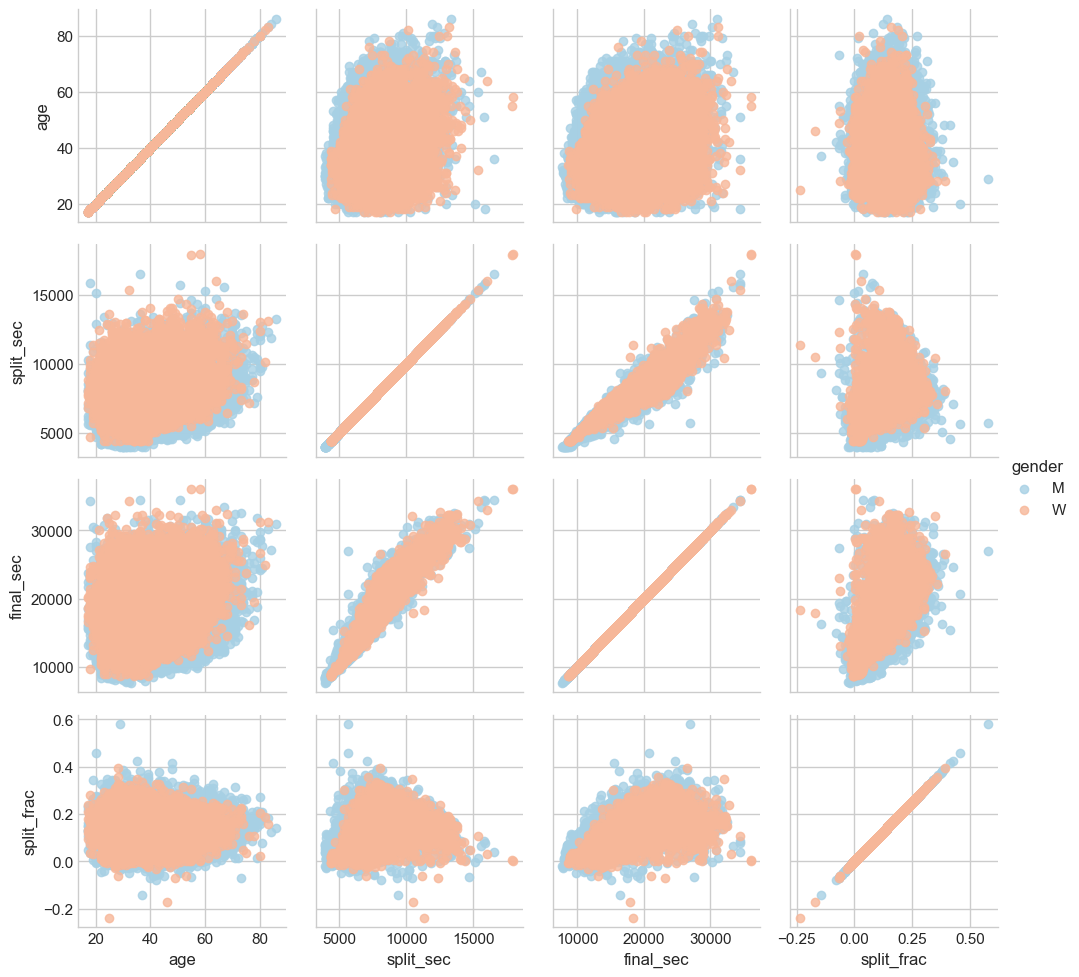

In [130]:
g= sns.PairGrid(df, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

Text(0.5, 0, 'split_frac')

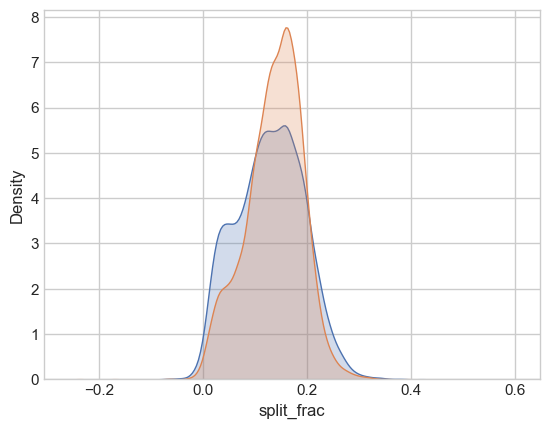

In [131]:
sns.kdeplot(df.split_frac[df.gender=='M'], label='men', fill=True)
sns.kdeplot(df.split_frac[df.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac')

C:\Users\user\AppData\Local\Temp\ipykernel_7236\3082421702.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='split_frac', data=df, palette=['lightblue', 'lightpink'])


<Axes: xlabel='gender', ylabel='split_frac'>

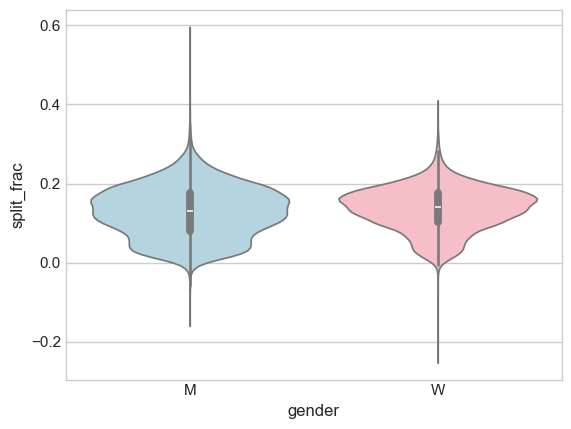

In [132]:
sns.violinplot(x='gender', y='split_frac', data=df, palette=['lightblue', 'lightpink'])

In [133]:
# 연령대 column 추가
df['age_dec'] = df.age.map(lambda age : 10 * (age//10))
df.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


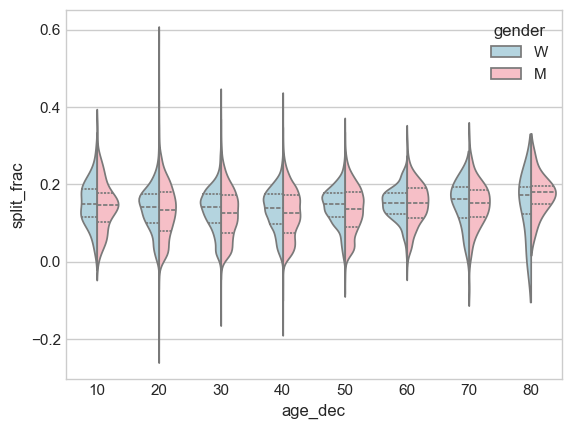

In [134]:
men = (df.gender == 'M')
women = (df.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x='age_dec', y='split_frac', hue='gender', data=df,
                   split=True, inner="quartile", palette=['lightblue', 'lightpink'])

In [ ]:
(df.age > 80).sum()

7

In [120]:
g= sns.lmplot(x='final_sec', y='split_frac', col='gender', data=df,
              markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=":")

KeyError: "['final_sec', 'split_frac'] not in index"

## 다중 서브플롯

In [136]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

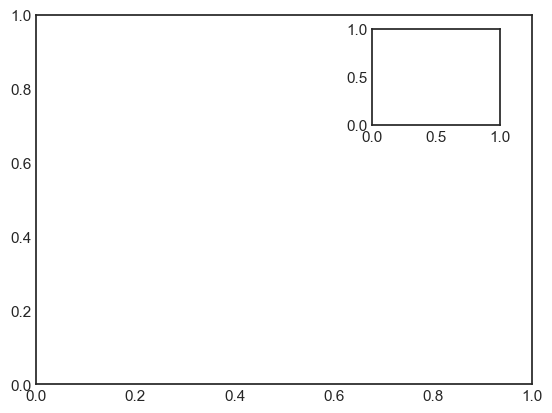

In [137]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

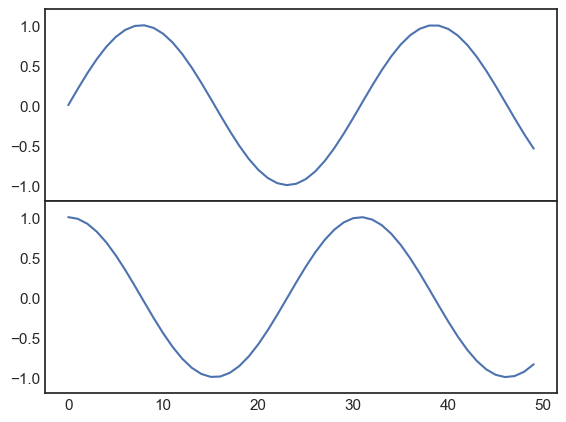

In [139]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2= fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

### 간단한 서브플롯의 그리드

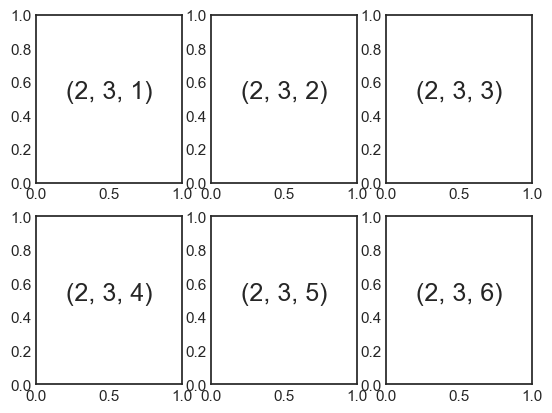

In [140]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha ='center')

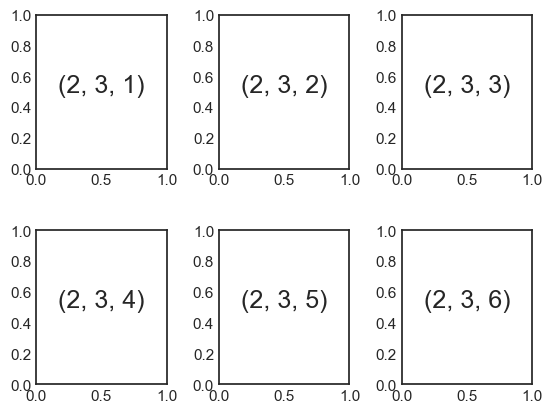

In [141]:
fig = plt.figure()
#여백 조절
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha ='center')

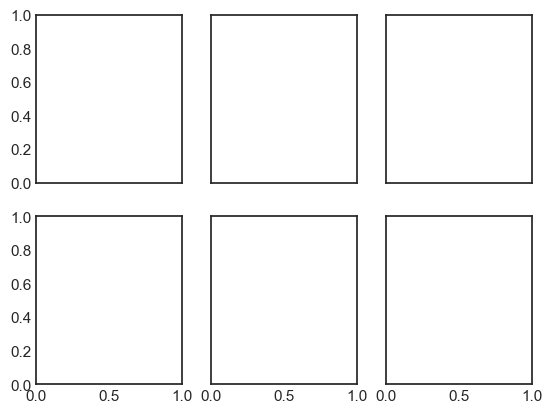

In [142]:
# 한번에 전체 그리드 만들기
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

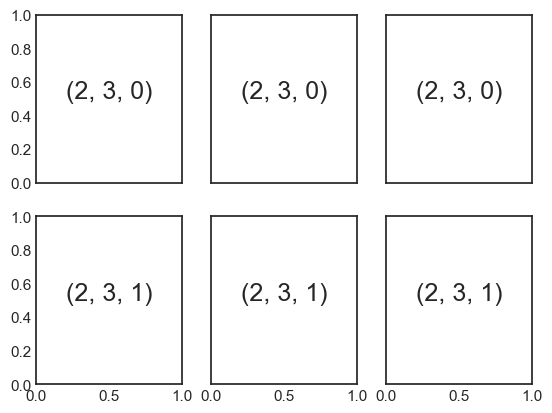

In [143]:
#축이 2차원 배열 안에 있어 [행, 열]로 인덱싱 가능
for i  in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha ='center')
fig

In [145]:
# Grid
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
grid

GridSpec(2, 3)

<Axes: >

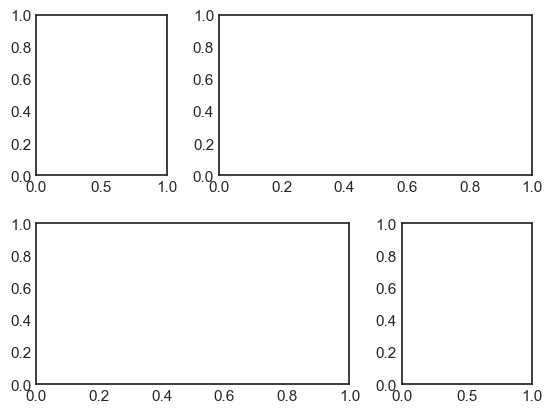

In [146]:
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

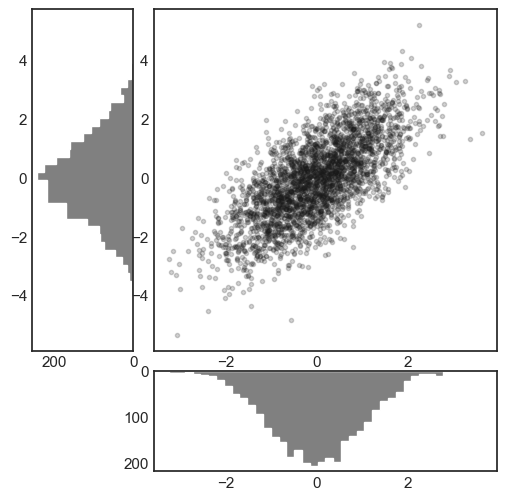

In [159]:
# 정규분포 데이터 만들기
mean = [0, 0]
cov = [[1,1], [1,2]]
x,y= np.random.multivariate_normal(mean, cov, 3000).T

# gridspec으로 축설정
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1,0], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:], sharex=main_ax)

#메인 축에 점 산포하기
main_ax.plot(x,y,'ok',markersize=3, alpha=0.2)

# 보조 축상 히스토그램
x_hist.hist(x, 40, histtype="stepfilled", orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype="stepfilled", orientation='horizontal', color='gray')
y_hist.invert_xaxis()